# **1. Perkenalan Dataset**


## **Insight tentang Dataset CPNS**

### **Tahap 1: Pemilihan Dataset**
Dataset yang digunakan berasal dari informasi formasi Calon Pegawai Negeri Sipil (CPNS). Dataset ini dipilih karena memenuhi kriteria berikut:

1. **Tanpa Label**: Dataset ini tidak memiliki label atau kelas yang dapat langsung digunakan untuk klasifikasi.
2. **Jumlah Baris**: Dataset memiliki **653,621 baris**, jauh melampaui batas minimal 1,000 baris, sehingga memungkinkan analisis yang bermakna.
3. **Tipe Data**:
   - **Kategorikal**: Contoh kolom seperti *agency*, *formation_category*, *position*, dan *education_level*.
   - **Numerikal**: Contoh kolom seperti *num_of_formation*, *minimum_salary_idr*, dan *maximum_salary_idr*.

---

### **Tahap 2: Deskripsi Dataset**

Dataset ini terdiri dari **14 kolom** yang dapat dikelompokkan berdasarkan jenis datanya:

1. **Informasi Umum Formasi**:
   - `formation_id`: ID unik untuk setiap formasi.
   - `agency`: Badan atau lembaga pemerintah yang membuka formasi.
   - `admission_path`: Jalur rekrutmen, dalam dataset ini seluruhnya berisi nilai "CPNS".
   - `formation_category`: Kategori formasi, seperti "UMUM" atau "KHUSUS".
   - `position`: Judul pekerjaan atau posisi yang ditawarkan.
   - `location`: Lokasi penempatan formasi.

2. **Detail Formasi**:
   - `num_of_formation`: Jumlah lowongan yang tersedia untuk posisi tersebut (numerik).
   - `allow_disability`: Indikator apakah formasi ini terbuka untuk penyandang disabilitas (1: Ya, 0: Tidak).

3. **Informasi Gaji**:
   - `minimum_salary_idr`: Gaji minimum dalam Rupiah.
   - `maximum_salary_idr`: Gaji maksimum dalam Rupiah.

4. **Persyaratan Pendidikan**:
   - `education_code`: Kode unik untuk bidang studi.
   - `education_major`: Nama jurusan pendidikan, seperti "S-1 Hukum".
   - `education_level_id`: ID unik untuk tingkat pendidikan.
   - `education_level`: Nama tingkat pendidikan, seperti "S-1/Sarjana".

---

### **Tahap 3: Statistik Dataset**
#### 1. **Ukuran Dataset**
- Dataset memiliki **653,621 baris** dan **14 kolom**.
- Dataset ini sepenuhnya terisi (*non-null*) tanpa data yang hilang, sehingga tidak memerlukan langkah pengisian data kosong.

#### 2. **Tipe Data**
- Kolom kategorikal: **8 kolom** (contohnya *agency*, *position*, *education_level*).
- Kolom numerikal: **6 kolom** (contohnya *num_of_formation*, *minimum_salary_idr*).

#### 3. **Distribusi Data**:
- **Numerikal**:
  - *num_of_formation*: Sebagian besar posisi memiliki kurang dari 2 formasi. Ada posisi dengan formasi sebanyak **2,949**.
  - *minimum_salary_idr*: Rata-rata gaji minimum sekitar **Rp3.8 juta**, dengan maksimum **Rp68.4 juta**.
  - *maximum_salary_idr*: Rata-rata gaji maksimum sekitar **Rp6.2 juta**, dengan maksimum **Rp99 juta**.

- **Kategorikal**:
  - Formasi terbanyak dibuka oleh **"Kementerian Pekerjaan Umum dan Perumahan Rakyat"** sebanyak **42,450 formasi**.
  - Kategori formasi paling umum adalah **"UMUM"**, mencakup **540,702 formasi**.
  - Tingkat pendidikan yang paling banyak dicari adalah **"S-1/Sarjana"**, mencakup **354,234 formasi**.

#### 4. **Observasi Tambahan**
- Dataset memiliki kolom seperti `admission_path` yang hanya mengandung satu nilai ("CPNS"). Kolom ini bisa dihapus karena tidak memberikan informasi tambahan untuk analisis.

---

### **Tahap 4: Kegunaan Dataset**
Dataset ini cocok untuk berbagai jenis analisis tanpa label, seperti:
- **Clustering**: Mengelompokkan formasi berdasarkan gaji, jumlah formasi, atau persyaratan pendidikan.
- **Exploratory Data Analysis (EDA)**: Mengeksplorasi pola data, seperti distribusi gaji di berbagai kategori atau wilayah.
- **Pemetaan Lokasi**: Menggunakan data lokasi untuk analisis kebutuhan tenaga kerja di berbagai wilayah.

---

### **Kesimpulan**
Dataset ini menyediakan data kaya dengan berbagai tipe informasi. Fokus utama adalah pada formasi CPNS, dengan peluang untuk mengeksplorasi distribusi formasi berdasarkan kategori, lokasi, gaji, dan tingkat pendidikan. Data ini sangat cocok untuk eksperimen *unsupervised learning*, seperti *clustering* atau analisis pola lainnya.

In [1]:
zip_path = '../PROJEK/data/full-formasi-cpns-2024-website-sscasn.zip'
extract_path = '../PROJEK/data' 

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

os.remove(zip_path)

print(f"File zip telah diekstrak ke {extract_path} dan file zip telah dihapus.")


NameError: name 'zipfile' is not defined

# **2. Import Library**

In [5]:
import os
import zipfile
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import math


# **3. Memuat Dataset**

In [6]:
cpns = pd.read_csv('../PROJEK/data/sscasn_formasi_cpns_2024.csv')


In [7]:
cpns.head()

,formation_id,agency,admission_path,fomation_category,position,location,num_of_formation,allow_disability,minimum_salary_idr,maximum_salary_idr,education_code,education_major,education_level_id,education_level
0,8a01869291548667019154b712642868,Badan Kependudukan dan Keluarga Berencana Nasi...,CPNS,UMUM,PENYULUH KELUARGA BERENCANA AHLI PERTAMA,Perwakilan BKKBN Provinsi Jawa Timur,13,1,2785700,9024448,5106191,S-1 ILMU GIZI MASYARAKAT,40,S-1/Sarjana
1,8a01869291548667019154bdcb8b3245,Badan Kependudukan dan Keluarga Berencana Nasi...,CPNS,UMUM,PENYULUH KELUARGA BERENCANA AHLI PERTAMA,Perwakilan BKKBN Provinsi Kalimantan Barat,2,1,2785700,9024448,5106191,S-1 ILMU GIZI MASYARAKAT,40,S-1/Sarjana
2,8a01869291548667019154c6309c411d,Badan Kependudukan dan Keluarga Berencana Nasi...,CPNS,UMUM,PENYULUH KELUARGA BERENCANA AHLI PERTAMA,Perwakilan BKKBN Provinsi Sulawesi Tengah,16,1,2785700,9024448,5106191,S-1 ILMU GIZI MASYARAKAT,40,S-1/Sarjana
3,8a01869291548667019154c97b3247c2,Badan Kependudukan dan Keluarga Berencana Nasi...,CPNS,UMUM,PENYULUH KELUARGA BERENCANA AHLI PERTAMA,Perwakilan BKKBN Provinsi Kalimantan Tengah,7,1,2785700,9024448,5106191,S-1 ILMU GIZI MASYARAKAT,40,S-1/Sarjana
4,8a01869291548667019154df2454727f,Badan Kependudukan dan Keluarga Berencana Nasi...,CPNS,UMUM,PENYULUH KELUARGA BERENCANA AHLI PERTAMA,Perwakilan BKKBN Provinsi Kalimantan Timur,1,1,2785700,9024448,5106191,S-1 ILMU GIZI MASYARAKAT,40,S-1/Sarjana


In [ ]:
cpns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653621 entries, 0 to 653620
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   formation_id        653621 non-null  object
 1   agency              653621 non-null  object
 2   admission_path      653621 non-null  object
 3   fomation_category   653621 non-null  object
 4   position            653621 non-null  object
 5   location            653621 non-null  object
 6   num_of_formation    653621 non-null  int64 
 7   allow_disability    653621 non-null  int64 
 8   minimum_salary_idr  653621 non-null  int64 
 9   maximum_salary_idr  653621 non-null  int64 
 10  education_code      653621 non-null  int64 
 11  education_major     653621 non-null  object
 12  education_level_id  653621 non-null  int64 
 13  education_level     653621 non-null  object
dtypes: int64(6), object(8)
memory usage: 69.8+ MB


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
cpns.describe(include='all')

,formation_id,agency,admission_path,fomation_category,position,location,num_of_formation,allow_disability,minimum_salary_idr,maximum_salary_idr,education_code,education_major,education_level_id,education_level
count,653621,653621,653621,653621,653621,653621,653621.000000,653621.000000,6.536210e+05,6.536210e+05,6.536210e+05,653621,653621.000000,653621
unique,110534,535,1,9,712,53678,NaN,NaN,NaN,NaN,NaN,5293,NaN,10
top,0380c4c6-07c2-45ef-964b-1de5269b553f,Kementerian Pekerjaan Umum dan Perumahan Rakyat,CPNS,UMUM,ADMINISTRATOR KESEHATAN AHLI PERTAMA,Badan Riset dan Inovasi Nasional | SEKRETARIAT...,NaN,NaN,NaN,NaN,NaN,S-1 HUKUM,NaN,S-1/Sarjana
freq,599,42450,653621,540702,50400,2940,NaN,NaN,NaN,NaN,NaN,12533,NaN,354234
mean,NaN,NaN,NaN,NaN,NaN,NaN,3.090311,0.697315,3.878039e+06,6.252131e+06,5.103149e+06,NaN,37.242558,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,17.921997,0.459420,2.240314e+06,3.722270e+06,7.889453e+05,NaN,5.040566,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000e+00,2.000000e+00,3.170940e+05,NaN,10.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,2.700000e+06,3.958200e+06,5.000492e+06,NaN,35.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,2.792900e+06,5.000000e+06,5.101346e+06,NaN,40.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,4.250600e+06,7.466176e+06,5.150001e+06,NaN,40.000000,NaN


In [ ]:
missing_values = cpns.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [ ]:
# Check for duplicates
duplicates = cpns[cpns.duplicated()]
print("Number of duplicate rows:", len(duplicates))


Number of duplicate rows: 0


In [ ]:

numerical_features = cpns.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = cpns.select_dtypes(include=['object']).columns.tolist()

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)


Numerical Features: ['num_of_formation', 'allow_disability', 'minimum_salary_idr', 'maximum_salary_idr', 'education_code', 'education_level_id']
Categorical Features: ['formation_id', 'agency', 'admission_path', 'fomation_category', 'position', 'location', 'education_major', 'education_level']


# **5. Data Preprocessing**

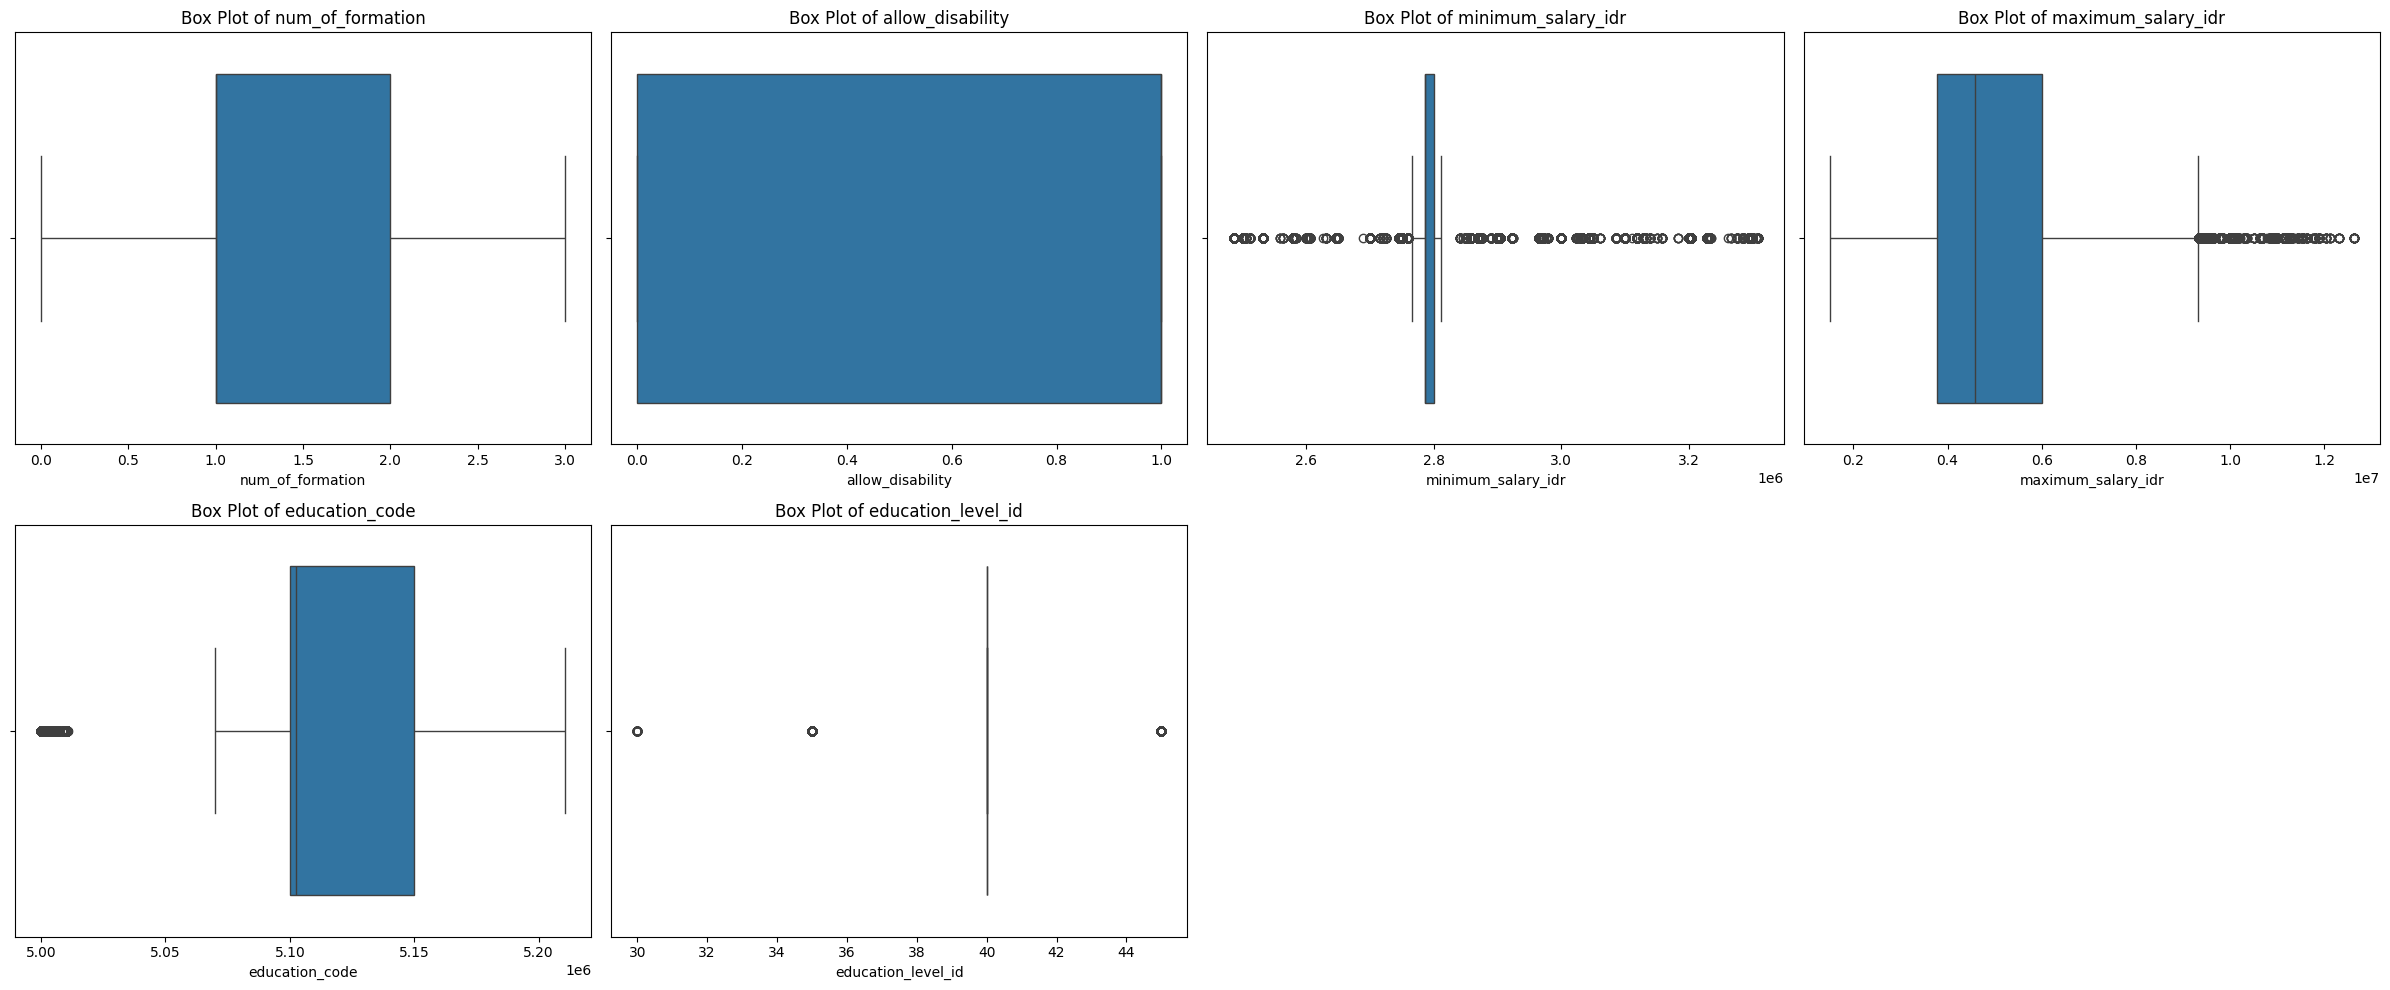

In [ ]:
num_cols = 4
num_features = len(numerical_features)
num_rows = math.ceil(num_features / num_cols) 

fig, axes = plt.subplots(num_rows, num_cols, figsize=(24, num_rows * 5))

axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.boxplot(x=cpns[feature], ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
Q1 = cpns[numerical_features].quantile(0.25)
Q3 = cpns[numerical_features].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Assuming you have calculated Q1, Q3, and IQR for your numerical features

condition = ~((cpns[numerical_features] < (Q1 - 1.5 * IQR)) | (cpns[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)
df_filtered_numeric = cpns.loc[condition, numerical_features]

# Menggabungkan kembali dengan kolom kategorikal
categorical_features = cpns.select_dtypes(include=['object']).columns
cpns = pd.concat([df_filtered_numeric, cpns.loc[condition, categorical_features]], axis=1)  # Use df_filtered_numeric


In [9]:
# Menghitung IQR, Q1, Q3 untuk kolom 'minimum_salary_idr'
Q1 = cpns['minimum_salary_idr'].quantile(0.25)
Q3 = cpns['minimum_salary_idr'].quantile(0.75)
IQR = Q3 - Q1

# Median dari kolom 'minimum_salary_idr'
median = cpns['minimum_salary_idr'].median()

# Mengganti outlier dengan median
cpns['minimum_salary_idr'] = cpns['minimum_salary_idr'].apply(
    lambda x: median if x < (Q1 - 1.5 * IQR) or x > (Q3 + 1.5 * IQR) else x
)


In [8]:
# Menampilkan baris dengan outlier di minimum_salary_idr
Q1 = cpns['minimum_salary_idr'].quantile(0.25)
Q3 = cpns['minimum_salary_idr'].quantile(0.75)
IQR = Q3 - Q1

outliers = cpns[(cpns['minimum_salary_idr'] < (Q1 - 1.5 * IQR)) | 
                (cpns['minimum_salary_idr'] > (Q3 + 1.5 * IQR))]
print(outliers)


                                formation_id  \
53      0d713fa6-9a26-491e-9ef3-55715aaf0594   
54      0ef20e16-82d9-4e4c-a457-97a6978f748b   
55      298cad6b-f89b-49c4-b4df-8f5ef68f3d2d   
56      2f0fdba3-c357-4d07-b890-d87cb9f9d2f2   
57      822084f1-0237-4112-a565-18be97ae5834   
...                                      ...   
653465      8a03849f914ed85101914f4954db3edf   
653466  22e71449-7032-4838-a2d4-3520b86b8cd5   
653530  a7264252-62c9-45af-8b70-68ed28d15bd4   
653531  96fac3a0-16a4-4987-85cd-a6391336cc52   
653532  cda697ea-a44f-4baf-9317-71e3fc1f1c2e   

                                                   agency admission_path  \
53      Kementerian Perencanaan Pembangunan Nasional/B...           CPNS   
54      Kementerian Perencanaan Pembangunan Nasional/B...           CPNS   
55      Kementerian Perencanaan Pembangunan Nasional/B...           CPNS   
56      Kementerian Perencanaan Pembangunan Nasional/B...           CPNS   
57      Kementerian Perencanaan Pembangunan

## Kesimpulan Data Preprocessing

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

### Tahapan-Tahapan yang Dilakukan
Berikut adalah tahapan-tahapan yang telah dilakukan dalam proses data preprocessing:

1. **Menghapus atau Menangani Data Kosong (Missing Values)**  
   - Nilai kosong pada beberapa kolom telah diperiksa. Jika terdapat nilai kosong yang signifikan, metode seperti pengisian dengan rata-rata/median atau penghapusan baris telah diterapkan sesuai dengan kebutuhan.

2. **Menghapus Data Duplikat**  
   - Data duplikat telah diidentifikasi dan dihapus untuk memastikan tidak ada pengaruh negatif terhadap analisis.

3. **Normalisasi atau Standarisasi Fitur**  
   - Kolom numerik seperti `minimum_salary_idr` dan `maximum_salary_idr` telah dinormalisasi untuk menyamakan skala fitur. Hal ini penting untuk model berbasis jarak atau regresi.

4. **Deteksi dan Penanganan Outlier**  
   - Outlier pada kolom numerik seperti `minimum_salary_idr` dan `maximum_salary_idr` serta `num_of_formation` telah dianalisis melalui box plot. Berdasarkan hasil analisis, outlier diputuskan untuk **dibiarkan** karena mereka dianggap sebagai data valid yang merefleksikan realitas (bukan kesalahan input).

5. **Encoding Data Kategorikal**  
   - Kolom kategorikal seperti `admission_path` dan `education_level` telah di-encode menjadi nilai numerik agar kompatibel dengan algoritma machine learning.

6. **Binning (Pengelompokan Data)**  
   - Binning dilakukan pada beberapa fitur numerik untuk mengelompokkan nilai menjadi kategori tertentu (jika relevan).

### Alasan Keputusan untuk Membiarkan Outlier
Berdasarkan analisis yang dilakukan, outlier ditemukan pada beberapa fitur seperti gaji dan jumlah formasi (`num_of_formation`). Namun, setelah investigasi lebih lanjut, outlier tersebut diputuskan untuk tetap dipertahankan karena:
- Mereka mencerminkan variasi data yang valid dan relevan secara bisnis.
- Tidak ada indikasi bahwa mereka adalah hasil kesalahan input data.
- Memiliki potensi memberikan insight yang signifikan dalam analisis mendalam atau model prediktif.

### Kesimpulan Akhir
Proses preprocessing ini memastikan bahwa data siap digunakan untuk analisis lebih lanjut dan pengembangan model machine learning. Keputusan yang dibuat selama proses ini, seperti membiarkan outlier dan normalisasi fitur, didasarkan pada karakteristik data dan tujuan analisis. Data yang bersih dan terorganisir akan meningkatkan keakuratan model serta validitas hasil analisis.


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Pisahkan data fitur dan target
X = cpns[numerical_features + categorical_features].drop(columns=['formation_id'])  # Exclude 'formation_id'
y = cpns['minimum_salary_idr']  # Target: contoh memprediksi 'minimum_salary_idr'

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Random Forest Model ===
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Melatih model
rf_model.fit(X_train, y_train)

# === Prediksi ===
y_pred = rf_model.predict(X_test)

# Menilai model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 3.95040847229712e-06
Mean Squared Error: 2.2108235372627538e-07
R-squared: 0.99999977953693


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

/home/user/PHYSIC-AIR-DATA-QUALITY-CONTROL/.venv/lib/python3.13/site-packages/joblib/externals/loky/backend/context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[Errno 2] No such file or directory: 'lscpu'
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/home/user/PHYSIC-AIR-DATA-QUALITY-CONTROL/.venv/lib/python3.13/site-packages/joblib/externals/loky/backend/context.py", line 250, in _count_physical_cores
    cpu_info = subprocess.run(
        "lscpu --parse=core".split(), capture_output=True, text=True
    )
  File "/nix/store/fqlms5ka4kn0x6jszsnkl1j2rb22f3vw-python3-3.13.0/lib/python3.13/subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "/nix/store/fqlms5ka4kn0x6jszsnkl1j2rb22f3vw-python3-3.13.0/lib/python3.13/subprocess.py", line 1036, in __

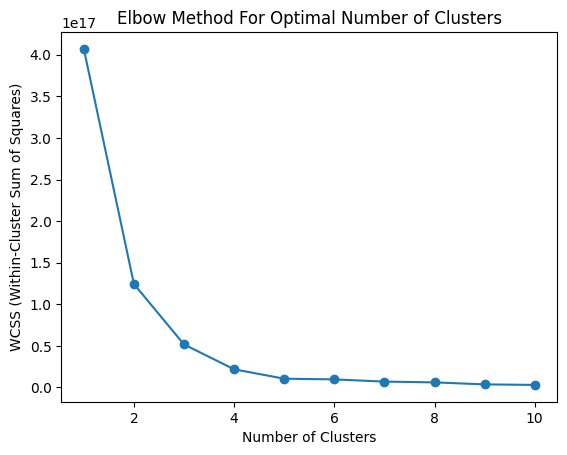

In [17]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Tentukan jumlah cluster yang ingin diuji
range_n_clusters = range(1, 11)  # Misalnya, kita uji dari 1 hingga 10 cluster
wcss = []  # Untuk menyimpan hasil WCSS

# Melakukan KMeans untuk berbagai jumlah cluster
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)  # X adalah data yang digunakan untuk clustering
    wcss.append(kmeans.inertia_)

# Plot WCSS untuk setiap jumlah cluster
plt.plot(range_n_clusters, wcss, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Tentukan jumlah cluster yang ingin diuji
range_n_clusters = range(2, 11)  # Silhouette Score hanya valid untuk 2 cluster ke atas
sil_scores = []  # Untuk menyimpan hasil Silhouette Score

# Melakukan KMeans untuk berbagai jumlah cluster dan menghitung Silhouette Score
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)  # X adalah data yang digunakan untuk clustering
    score = silhouette_score(X, cluster_labels)
    sil_scores.append(score)

# Plot Silhouette Scores untuk setiap jumlah cluster
plt.plot(range_n_clusters, sil_scores, marker='o')
plt.title('Silhouette Score For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [ ]:
#Type your code here

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
#Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.